In [1]:
import numpy as np  
import pandas as pd  


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
# df = pd.read_csv('C:/Users/bagka/Data mining Project/crime_test.csv')
df = pd.read_csv('C:/Users/bagka/Data mining Project/crime_bb_1.csv')

# np.isnan(df.any())
df

C:\Users\bagka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,10/03/18 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,08/30/18 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,10/03/18 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,10/03/18 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,10/03/18 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,10/02/18 20:40,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,10/03/18 20:16,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,10/03/18 19:32,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,10/03/18 19:27,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,10/03/18 20:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [4]:
district = df.groupby(['DISTRICT']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)


year = df.groupby(['YEAR']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

offense = df.groupby(['OFFENSE_DESCRIPTION']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

df.dropna(subset=['DISTRICT'],how='all', inplace=True)

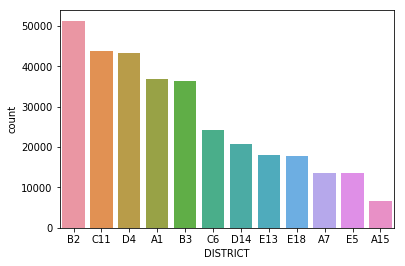

In [5]:

sns.barplot(x = "DISTRICT",     
            y= "count",        
            data=district
            )

In [6]:
x = df['DISTRICT'].dropna()
y = df['YEAR'].dropna()
z = df['OFFENSE_CODE'].dropna().astype(int)

# p = sns.pairplot(pd.DataFrame(list(zip(x, y, z)), columns=['DISTRICT','YEAR', 'OFFERNCE']), hue='DISTRICT', palette="husl") 


In [19]:
B2 = df.loc[df['DISTRICT'] == 'B2']
A15 = df.loc[df['DISTRICT'] == 'A15']
B3 = df.loc[df['DISTRICT'] == 'B3']
A1 = df.loc[df['DISTRICT'] == 'A1']



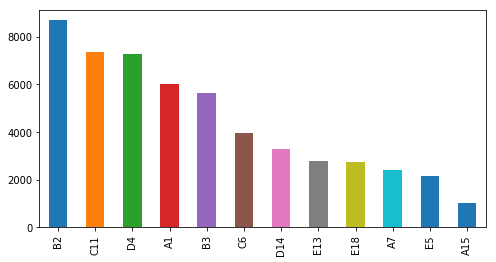

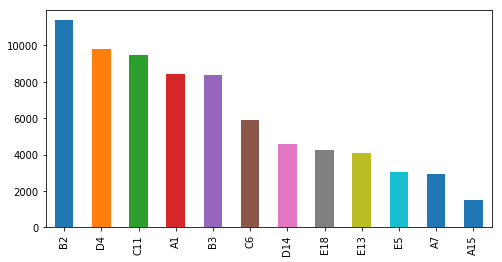

In [11]:
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2015].value_counts().plot.bar()
plt.show()

plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2018].value_counts().plot.bar()
plt.show()


# sns.catplot(y='Street',
#            kind='count',
#             height=8, 
#             aspect=1.5,
#             order=B2["STREET"].value_counts().index,
#            data=B2)


In [18]:
offense=pd.pivot_table(B3.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']],index='OFFENSE_CODE_GROUP',
              columns='YEAR',aggfunc=np.count_nonzero)
summary=pd.DataFrame(offense.apply(np.sum,axis=1))
summary=summary.rename(columns={0:'total'})

sumsort=summary.sort_values(by='total',ascending=False)
top10=sumsort.iloc[0:10,:]
top10

,total
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,3934.0
Verbal Disputes,3047.0
Investigate Person,2535.0
Medical Assistance,2351.0
Other,2216.0
Vandalism,1953.0
Simple Assault,1870.0
Drug Violation,1564.0
Investigate Property,1469.0


In [29]:
offense=pd.pivot_table(B2.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']],index='OFFENSE_CODE_GROUP',
              columns='YEAR',aggfunc=np.count_nonzero)
summary=pd.DataFrame(offense.apply(np.sum,axis=1))
summary=summary.rename(columns={0:'total'})

sumsort=summary.sort_values(by='total',ascending=False)
top10=sumsort.iloc[0:10,:]
top10

,total
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,6590.0
Medical Assistance,3446.0
Other,3401.0
Verbal Disputes,3089.0
Larceny,2939.0
Investigate Person,2806.0
Simple Assault,2581.0
Vandalism,2501.0
Drug Violation,2350.0


In [84]:
# street crime rate
sumsort = A1.groupby(['STREET','OFFENSE_CODE_GROUP']).size().reset_index(name="Count").sort_values(by=['Count'], ascending=False)
top10=sumsort.iloc[0:10,:]
top10



,STREET,OFFENSE_CODE_GROUP,Count
4709,WASHINGTON ST,Larceny,942
696,BOYLSTON ST,Drug Violation,393
4509,TREMONT ST,Larceny,242
4718,WASHINGTON ST,Other,236
4530,TREMONT ST,Simple Assault,235
2777,LEGENDS WAY,Investigate Property,233
733,BOYLSTON ST,Warrant Arrests,233
4870,WINTER ST,Larceny,215
4731,WASHINGTON ST,Simple Assault,174
4522,TREMONT ST,Property Lost,173


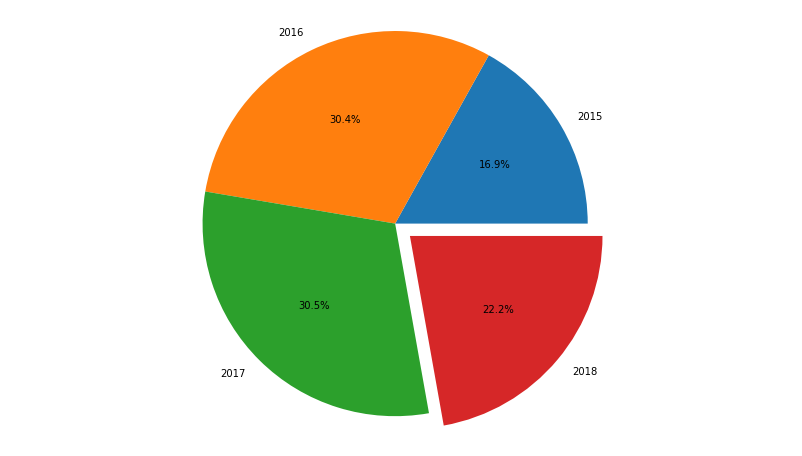

In [96]:

labels = B2['YEAR'].astype('category').cat.categories.tolist()
counts = B2['YEAR'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0.1) 

ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%') 
ax1.axis('equal')
plt.show()


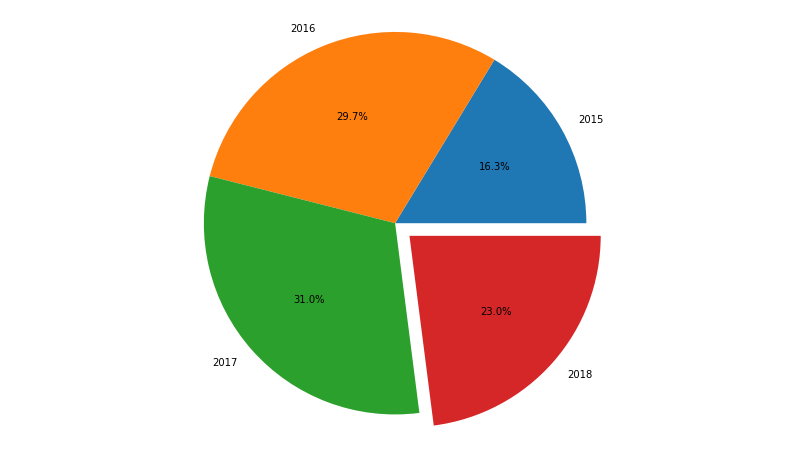

In [97]:

labels = A1['YEAR'].astype('category').cat.categories.tolist()
counts = A1['YEAR'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0.1) 

ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%') 
ax1.axis('equal')
plt.show()



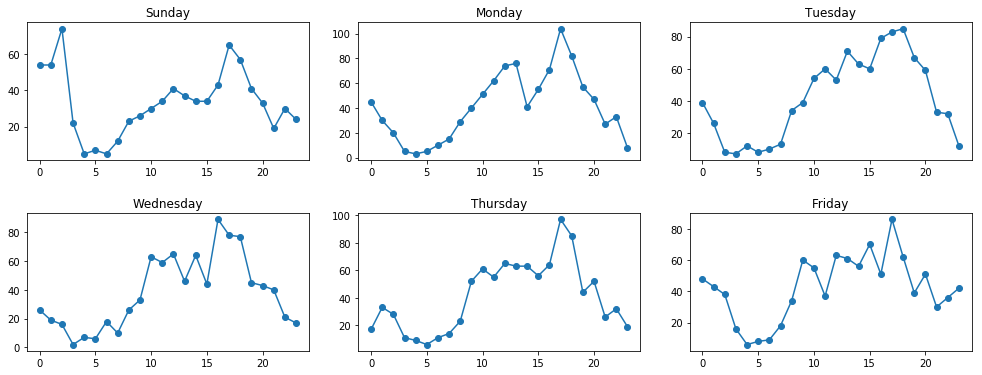

In [87]:
#Day wise crime
import pylab
pylab.rcParams['figure.figsize'] = (14.0, 8.0)  

data = A1.loc[A1['STREET'].isin(['WASHINGTON ST','BOYLSTON ST','TREMONT ST'])]   



Sunday = data[data['DAY_OF_WEEK'] == "Sunday"]
Monday = data[data['DAY_OF_WEEK'] == "Monday"]
Tuesday = data[data['DAY_OF_WEEK'] == "Tuesday"]
Wednesday = data[data['DAY_OF_WEEK'] == "Wednesday"]
Thursday = data[data['DAY_OF_WEEK'] == "Thursday"]
Friday = data[data['DAY_OF_WEEK'] == "Friday"]
Saturday = data[data['DAY_OF_WEEK'] == "Saturday"]


ax2 = plt.subplot2grid((3,3), (1, 0))
ax2.plot(Sunday.groupby('HOUR').size(), 'o-')
ax2.set_title ('Sunday')

ax2 = plt.subplot2grid((3,3), (1, 1))
ax2.plot(Monday.groupby('HOUR').size(), 'o-')
ax2.set_title ('Monday')

ax2 = plt.subplot2grid((3,3), (1, 2))
ax2.plot(Tuesday.groupby('HOUR').size(), 'o-')
ax2.set_title ('Tuesday')

ax2 = plt.subplot2grid((3,3), (2, 0))
ax2.plot(Wednesday.groupby('HOUR').size(), 'o-')
ax2.set_title ('Wednesday')

ax2 = plt.subplot2grid((3,3), (2, 1))
ax2.plot(Thursday.groupby('HOUR').size(), 'o-')
ax2.set_title ('Thursday')

ax2 = plt.subplot2grid((3,3), (2, 2))
ax2.plot(Friday.groupby('HOUR').size(), 'o-')
ax2.set_title ('Friday')

plt.tight_layout(2)
plt.show()